Heart Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.idea', 'best_heart_disease_model.pkl', 'heart.csv', 'heart_notebook_predictor.ipynb']


In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


Explanatory Data analysis

target
1    165
0    138
Name: count, dtype: int64


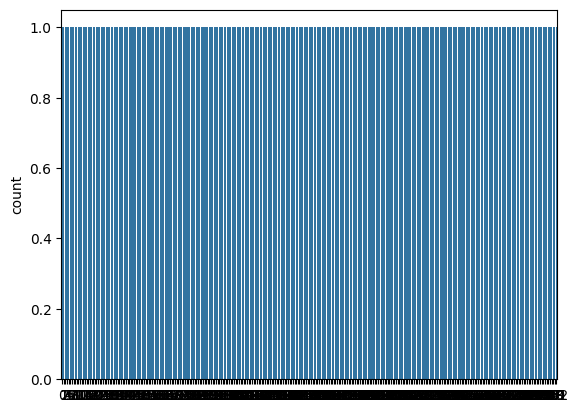

In [13]:
y = dataset["target"]
sns.countplot(y)

target_temp = dataset.target.value_counts()

print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [15]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

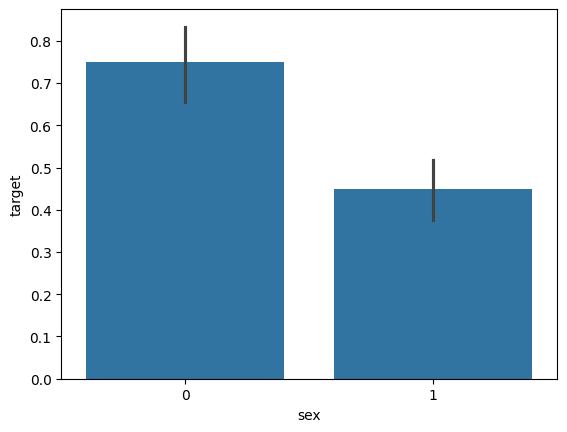

In [16]:
sns.barplot(x=dataset["sex"],y=y)

In [17]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

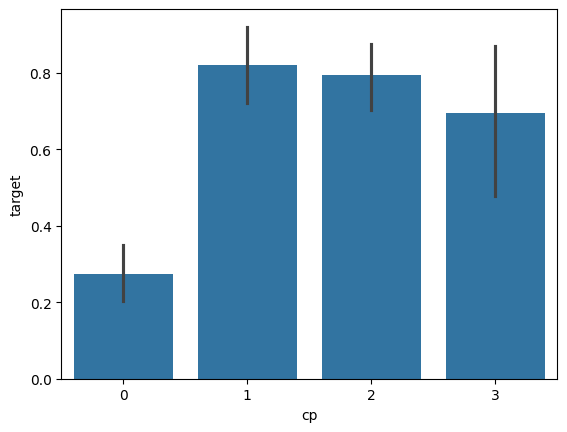

In [18]:
sns.barplot(x=dataset["cp"],y=y)

In [19]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

<Axes: xlabel='fbs', ylabel='target'>

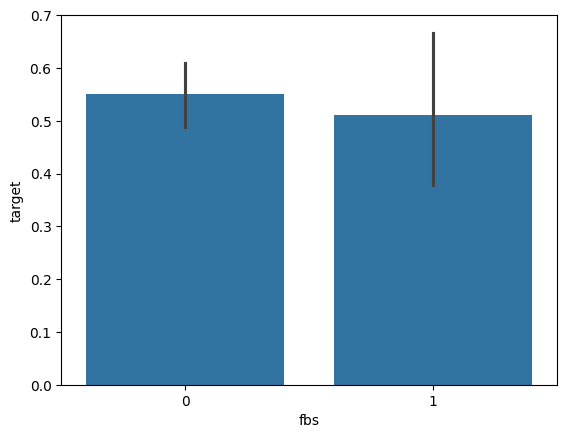

In [20]:
sns.barplot(x=dataset["fbs"],y=y)

In [21]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

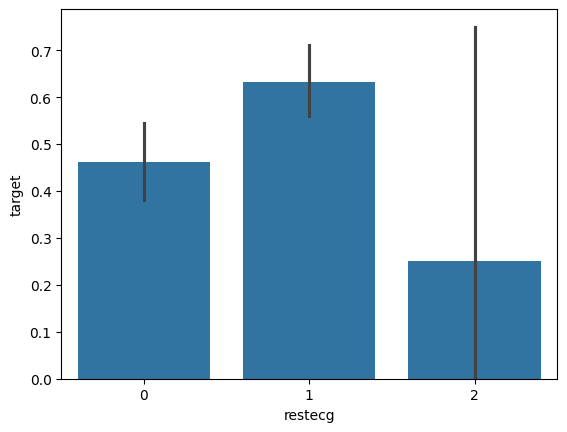

In [22]:
sns.barplot(x=dataset["restecg"], y=y)

In [23]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

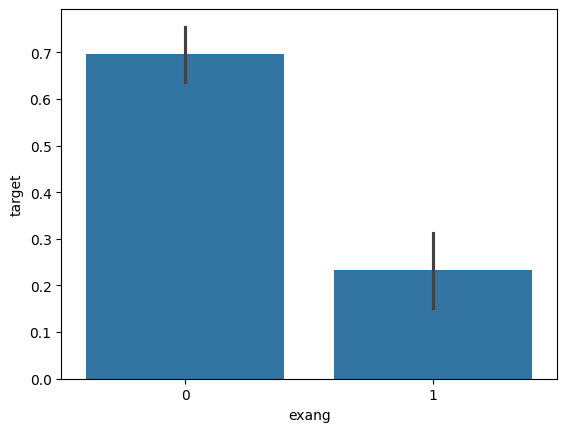

In [24]:
sns.barplot(x=dataset["exang"], y=y)

In [25]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

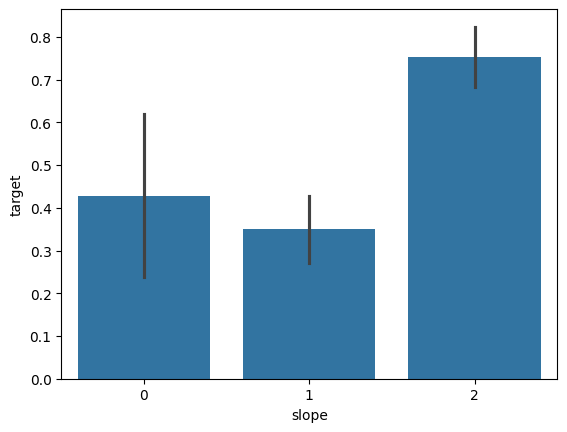

In [26]:
sns.barplot(x=dataset["slope"], y=y)

In [27]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: ylabel='count'>

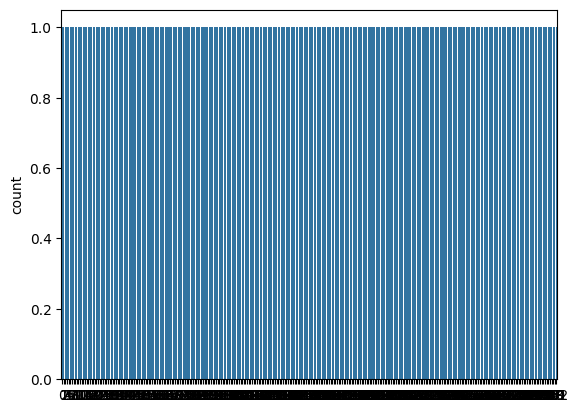

In [28]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

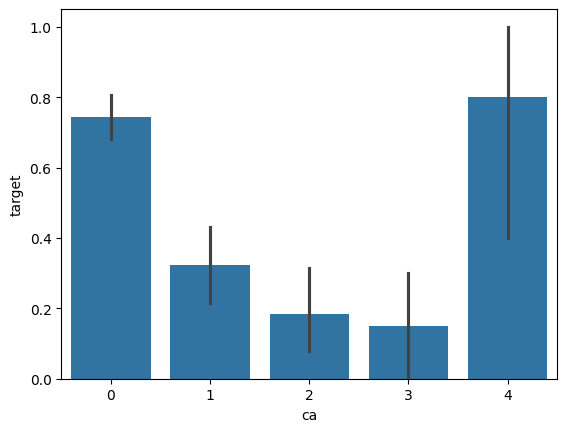

In [29]:
sns.barplot(x=dataset["ca"],y=y)

In [30]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

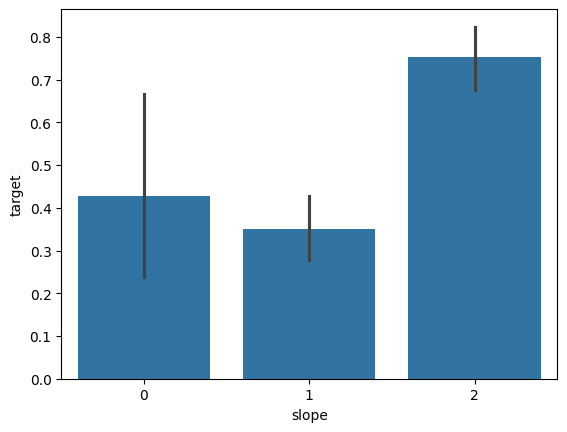

In [31]:
sns.barplot(x=dataset["slope"], y=y)

<Axes: xlabel='thal', ylabel='Density'>

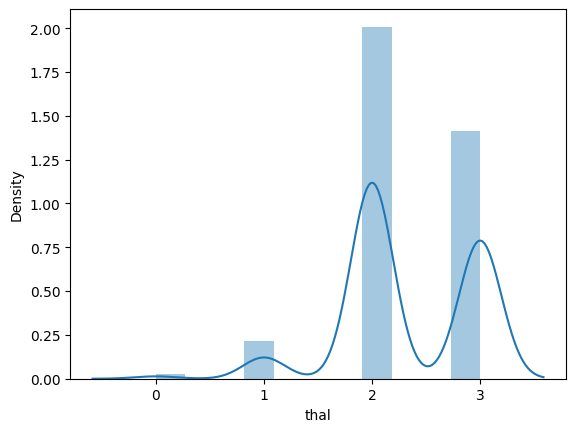

In [32]:
sns.distplot(dataset["thal"])

Train Test Split 

In [33]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [34]:
X_train.shape

(242, 13)

In [35]:
X_test.shape

(61, 13)

In [36]:
Y_train.shape

(242,)

In [37]:
Y_test.shape

(61,)

model Fitting

In [38]:
#logistic regressuion 
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [40]:
Y_pred_lr.shape

(61,)

In [41]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [42]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [43]:
Y_pred_nb.shape

(61,)

In [44]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [45]:
#SVm

In [46]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [47]:
Y_pred_svm.shape

(61,)

In [48]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [49]:
#k nearest neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [51]:
Y_pred_knn.shape

(61,)

In [52]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [53]:
#Decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [55]:
print(Y_pred_dt.shape)

(61,)


In [56]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [57]:
#Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [59]:
Y_pred_rf.shape

(61,)

In [60]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [61]:
#XGBoost 

In [62]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [63]:
Y_pred_xgb.shape

(61,)

In [64]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [65]:
#Neural Network 

In [66]:
from keras.api.models import Sequential
from keras.api.layers import Dense

In [67]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5177 - loss: 69.1992  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5368 - loss: 57.9522 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5567 - loss: 47.4887 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5263 - loss: 41.9923 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5064 - loss: 35.4123 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5426 - loss: 24.2817 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5183 - loss: 17.5478 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5046 - loss: 9.6077  
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4399 - loss: 3.1145 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4689 - loss: 3.7647 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4988 - loss: 2.5739 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4

In [69]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [70]:
Y_pred_nn.shape

(61, 1)

In [71]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [72]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 81.97 %


In [73]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 81.97 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

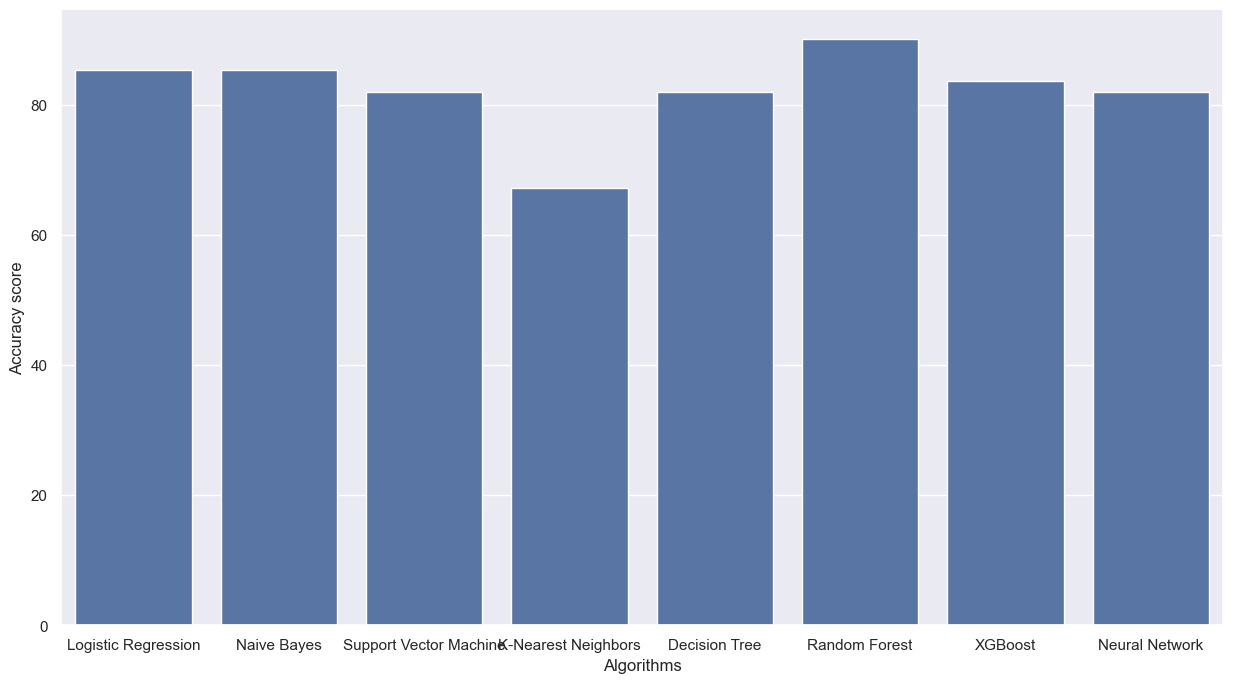

In [74]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [75]:
# Your scores and models
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", "K-Nearest Neighbors",
              "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]

# Print all model accuracies
for i in range(len(algorithms)):
    print(f"The accuracy score achieved using {algorithms[i]} is: {scores[i]} %")

# Find the index of the best model
best_model_index = scores.index(max(scores))
print("\n✅ Best model is:", algorithms[best_model_index], "with accuracy:", scores[best_model_index], "%")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 81.97 %

✅ Best model is: Random Forest with accuracy: 90.16 %


In [79]:
import pickle
filename = 'heart-disease-predictor.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [80]:
from sklearn.metrics import accuracy_score

#loading the saved model
with open('heart-disease-predictor.pkl', 'rb') as model_file:
    loaded_rf = pickle.load(model_file)

#make prediction using the model
Y_pred_loaded_rf = loaded_rf.predict(X_test)

#evaluating the loaded model
loaded_accuracy = round(accuracy_score(Y_pred_loaded_rf, Y_test) * 100 , 2)
print(f"accuracy of the model: {loaded_accuracy}%")

accuracy of the model: 90.16%


In [91]:
# Import necessary libraries (if not already imported)
import numpy as np
import pickle

# Load the saved model
with open('heart-disease-predictor.pkl', 'rb') as model_file:
    loaded_rf = pickle.load(model_file)

# Create a new sample patient with very low risk factors
patient= np.array([[
    68,                # Age - older
    1,                 # Sex (1 = male)
    3,                 # Chest pain type (asymptomatic = 3, worst)
    160,               # Resting blood pressure - high
    290,               # Cholesterol - very high
    1,                 # Fasting blood sugar (1 = >120 mg/dl)
    2,                 # Resting ECG (2 = abnormal)
    105,               # Max heart rate achieved - low
    1,                 # Exercise induced angina - yes
    2.5,               # Oldpeak - significant ST depression
    2,                 # Slope - downsloping (bad)
    2,                 # Number of major vessels
    3                  # Thalassemia (fixed defect)
]])


# Make prediction
prediction = loaded_rf.predict(patient)
prediction_probability = loaded_rf.predict_proba(patient)   

# Interpret the results
if prediction[0] == 0:
    risk_status = "NOT AT RISK"
else:
    risk_status = "AT RISK"

# Print the results
print(f"Heart Disease Prediction: {risk_status}")

Heart Disease Prediction: NOT AT RISK
